# CODE IMPLEMENTING RECOMMENDER SYSTEMS

- This notebook implememnts a movie recommender system
- Recommender systems are used to suggest movies or songs to users based on interest or usage history
- For ex: Netflxi recommends movies based on previous movies you've watched
- We'll be using Item - Based Collaborative Filtering

In [2]:
# Import libraries
import pandas as pd #data manipulation/excel
import numpy as np # numerical analysis
import seaborn as sns #data visualization & plotting
import matplotlib.pyplot as plt #data visualization & plotting

## Data

In [3]:
movie_titles_df = pd.read_csv("Movie_Id_Titles")

In [4]:
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
# Visualize data
movie_titles_df.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
movie_titles_df.tail(5)

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [7]:
movies_rating_df = pd.read_csv("u.data", sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [8]:
movies_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [9]:
# Drop timestamp column
movies_rating_df.drop('timestamp', axis=1, inplace=True)

In [10]:
movies_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [11]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [12]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [13]:
# Combine both dataframes
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id')

In [14]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [15]:
movies_rating_df.shape

(100003, 4)

In [16]:
# Visualize the data - "group by" movies that have the same title
movies_rating_df.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [17]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [18]:
# Create mean & count column
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [19]:
ratings_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [20]:
rating_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [21]:
rating_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [22]:
# Concatenate dataframes
ratings_mean_count_df = pd.concat([rating_df_count, ratings_df_mean], axis = 1)

In [23]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


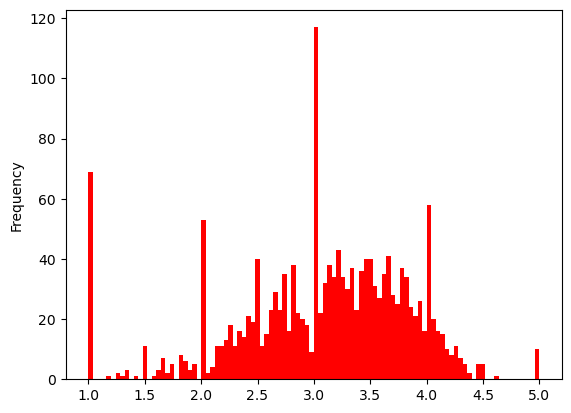

In [24]:
ratings_mean_count_df['mean'].plot(bins = 100, kind = 'hist', color = 'r');

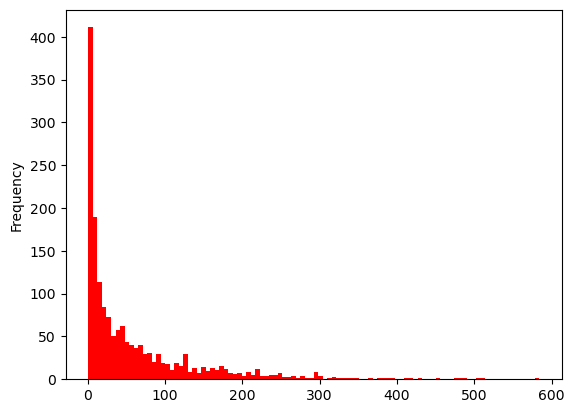

In [25]:
ratings_mean_count_df['count'].plot(bins = 100, kind = 'hist', color = 'r');

In [26]:
ratings_mean_count_df[  ratings_mean_count_df['mean']  == 5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [27]:
ratings_mean_count_df.sort_values('count', ascending = False).head(40)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


In [28]:
ratings_mean_count_df.sort_values('count', ascending = True).head(40)

,count,mean
title,,
Á köldum klaka (Cold Fever) (1994),1.0,3.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
"Man from Down Under, The (1943)",1.0,1.0
Mamma Roma (1962),1.0,4.0
Mad Dog Time (1996),1.0,3.0
"Big Bang Theory, The (1994)",1.0,4.0
MURDER and murder (1996),1.0,2.0


In [30]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [32]:
# Create confusion matrix for data visualization
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [33]:
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Checks how many users have watched the Titanic
titanic = userid_movietitle_matrix['Titanic (1997)']

In [40]:
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [43]:
# Show th ecolumn for Star-Wars
starwars = userid_movietitle_matrix['Star Wars (1977)']

In [44]:
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [47]:
# Correlations of the Titanic data
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns = ['Correlation'])

/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stdde

In [48]:
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])

In [49]:
titanic_correlations

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [50]:
# Dropping numbers with any Nan values
titanic_correlations.dropna(inplace = True)
titanic_correlations

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
...,...,...
Year of the Horse (1997),1.000000,7.0
Young Frankenstein (1974),0.107666,200.0
Young Guns (1988),0.199931,101.0


In [51]:
# Sort by ascending order (Highest correlation to lowest)
titanic_correlations.sort_values('Correlation', ascending = False)

,Correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0
...,...,...
Lamerica (1994),-1.0,4.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [54]:
# Focus on movies reviewed several times
titanic_correlations[  titanic_correlations['count'] > 80].sort_values('Correlation', ascending = False).head()

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0


In [57]:
# Starwars Correlations
starwars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns = ['Correlation'])

/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/re-routeentertainment/Desktop/movie-recommender/env/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divid

In [58]:
starwars_correlations

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [59]:
starwars_correlations = starwars_correlations.join(ratings_mean_count_df['count'])

In [60]:
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0
Zeus and Roxanne (1997),0.818182,6.0


In [61]:
# Dropping any numbers with Nan values
starwars_correlations.dropna(inplace = True)
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
...,...,...
Young Guns (1988),0.186377,101.0
Young Guns II (1990),0.228615,44.0
"Young Poisoner's Handbook, The (1995)",-0.007374,41.0


In [62]:
# Sort by ascending order (Highest correlation to lowest)
starwars_correlations.sort_values('Correlation', ascending = False)

,Correlation,count
title,,
Hollow Reed (1996),1.0,6.0
Stripes (1981),1.0,5.0
Star Wars (1977),1.0,584.0
Man of the Year (1995),1.0,9.0
"Beans of Egypt, Maine, The (1994)",1.0,2.0
...,...,...
For Ever Mozart (1996),-1.0,3.0
Frankie Starlight (1995),-1.0,4.0
I Like It Like That (1994),-1.0,3.0


In [69]:
# Focus on movies reviewed several times
starwars_correlations[  starwars_correlations['count'] > 80].sort_values('Correlation', ascending = False).head(20)

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
"Sting, The (1973)",0.367538,241.0
Indiana Jones and the Last Crusade (1989),0.350107,331.0
Pinocchio (1940),0.347868,101.0
"Frighteners, The (1996)",0.332729,115.0


In [68]:
## Create an item based collaborative filter on the entire dataset
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)

In [71]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
my_ratings = pd.read_csv("My_Ratings.csv")

In [81]:
my_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [91]:
my_ratings['Movie Name'][0]

'Liar Liar (1997)'

In [92]:
similar_movies_list = []

for i in range(0, 2):
    similar_movie = movie_correlations[my_ratings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x * my_ratings['Ratings'][i])
    similar_movies_list.append(similar_movie)

# Concatenate the list of Series into a single Series
similar_movies_list = pd.concat(similar_movies_list)

# Assuming you want to sum the correlations for each movie
similar_movies_list = similar_movies_list.groupby(similar_movies_list.index).sum()

# Display the top similar movies
top_similar_movies = similar_movies_list.sort_values(ascending=False).head(15)
print(top_similar_movies)


title
Liar Liar (1997)                             5.150292
Con Air (1997)                               2.590845
Pretty Woman (1990)                          2.470894
Indiana Jones and the Last Crusade (1989)    2.422243
Michael (1996)                               2.350934
Top Gun (1986)                               2.203418
Back to the Future (1985)                    2.164978
Ghost and the Darkness, The (1996)           2.116499
Field of Dreams (1989)                       2.086980
Raiders of the Lost Ark (1981)               2.035313
Jurassic Park (1993)                         2.025974
Grumpier Old Men (1995)                      1.994809
Multiplicity (1996)                          1.975522
Aladdin (1992)                               1.964149
Shawshank Redemption, The (1994)             1.947649
dtype: float64


In [93]:
similar_movies_list = []

for i in range(1, 2):
    similar_movie = movie_correlations[my_ratings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x * my_ratings['Ratings'][i])
    similar_movies_list.append(similar_movie)

# Concatenate the list of Series into a single Series
similar_movies_list = pd.concat(similar_movies_list)

# Assuming you want to sum the correlations for each movie
similar_movies_list = similar_movies_list.groupby(similar_movies_list.index).sum()

# Display the top similar movies
top_similar_movies = similar_movies_list.sort_values(ascending=False).head(15)
print(top_similar_movies)

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
Dumbo (1941)                                          0.317656
Bridge on the River Kwai, The (1957)                  0.316580
Philadelphia Story, The (1940)                        0.314272
Miracle on 34th Street (1994)                         0.310921
E.T. the Extra-Terrestrial (1982)                     0.303619
Name: Star Wars (1977), dtype: float64
